<a href="https://colab.research.google.com/github/sk-0226/assignmt_2/blob/main/zID_Project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
PROJECT 2: HDAT9500 T2 2025

---







---

**zID:** z5514968

**Name: Seong-hee Kwon**

Also, include the date you created this program.

Any other metadata you wish to add

???????see the file -
**Laboratory_07_CV_Intro_ANN_Solution.ipynb**



## 📎 Metadata

- **Author:** Your Name  
- **Date Created:** YYYY-MM-DD  
- **Last Modified:** YYYY-MM-DD  
- **Programming Language:** Python 3.x  
- **Tools & Libraries:** NumPy, Pandas, Matplotlib, Scikit-learn, TensorFlow/Keras  
- **Dataset Source:** UCI Machine Learning Repository – Breast Cancer Wisconsin Diagnostic Data  
- **License:** MIT (or specify if academic project)  
- **Notebook Version:** 1.0  
- **Status:** In progress / Complete  
- **Reviewers:** (if peer-reviewed or part of a team)


## 🔍 Description

This notebook demonstrates the complete machine learning pipeline:
- Exploratory Data Analysis (EDA)
- Data preprocessing and normalization
- Model architecture selection and training
- Evaluation using classification metrics (accuracy, precision, recall, F1-score)
- Visualization of performance and learning curves

---
## 📤 Output

- Trained model** file (`.h5` or `.pkl`)**
- Confusion matrix and evaluation reports
- Accuracy and loss plots
- Summary notebook for reproducibility

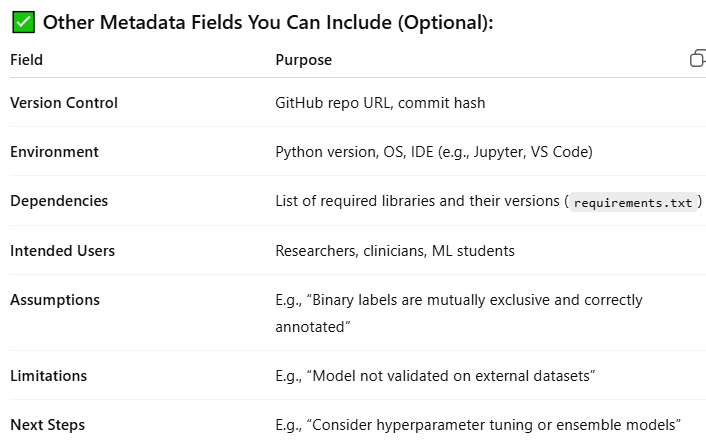
#####################################################################################

# Introduction
**Background and Motivation**

Breast cancer is a leading cause of cancer-related deaths among women globally. Accurate and timely diagnosis is crucial for effective treatment and improved patient outcomes. Quantitative features from histopathological analysis of breast tumor cell nuclei, such as radius, texture, and concavity, can help differentiate benign from malignant tumors. Machine learning, particularly Artificial Neural Networks (ANNs), offers potential for enhancing diagnostic accuracy by capturing complex patterns in high-dimensional medical data. However, their performance, interpretability, and generalization in healthcare contexts require thorough evaluation.

**Project Aims**
- To develop and evaluate a Feedforward Neural Network (FNN), or Multilayer Perceptron (MLP), for classifying breast tumors as benign or malignant using cell nuclei features from the Breast Cancer Wisconsin Dataset.
- To assess the predictive performance of a basic ANN and its suitability as a baseline for future clinical applications.
- To identify the most influential features driving classification, providing insights into their biological and clinical significance.

**Methodology**

This project follows the machine learning workflow from the HDAT9500 - Machine Learning 1 course, with the following key steps:
- Data Preparation
  - Load the Breast Cancer Wisconsin Dataset using scikit-learn's load_breast_cancer().
  - Perform feature scaling and train/test split.
- Model Development
    - Build and train a basic FNN/MLP using TensorFlow and Keras.
- Evaluation
  - Measure model performance with classification metrics (accuracy, precision, recall, F1-score, ROC-AUC).
  - Visualize training history and confusion matrix.
- Feature Analysis
  - Identify key features contributing to classification (e.g., via weights or permutation importance).

The results will determine whether a simple ANN is adequate or if advanced techniques (e.g., regularization, hyperparameter tuning, or ensemble methods) are needed for improved performance.

# <font color='purple'>**Question 1: Project Preparation**

# 1.1 Health Data Science Question
- Health question:
    - Which cell nuclei features in the Breast Cancer Wisconsin Dataset are most significantly associated with differentiating benign from malignant breast tumors?
- Health Data Science question:
  - Which machine learning algorithm provides the best performance for classifying breast tumors as benign or malignant using cell nuclei measurements from the Breast Cancer Wisconsin Dataset? What are the most influential features for accurate classification?
  - Target Variable: Diagnosis (0 = benign, 1 = malignant)
  - Input Variables: Numerical measurements of cell nuclei characteristics (e.g., mean radius, mean texture, mean smoothness, mean concavity, etc.)
  - Task Type: Binary classification

  *References*: https://www.spiedigitallibrary.org/conference-proceedings-of-spie/1905/1/Nuclear-feature-extraction-for-breast-tumor-diagnosis/10.1117/12.148698.short

# 1.2 Method Evaluation - Success Criteria  <u>(to be finalised)

The success of this project will be determined by the Feedforward Neural Network's ability to accurately classify breast tumors as benign or malignant using cell nuclei features from the Breast Cancer Wisconsin Dataset. The following metrics will be used to evaluate performance:

1. Classification Accuracy
- The proportion of correctly classified instances (both benign and malignant) over the total number of samples.
- While accuracy is a general indicator of model performance, it may be less informative if class imbalance is present.

2. Precision, Recall, and F1-Score
- Precision measures the proportion of predicted malignant cases that are truly malignant, minimizing false positives.
- Recall (Sensitivity) assesses how well the model detects actual malignant cases, minimizing false negatives — which is critical in a clinical context.
- F1-Score balances precision and recall, especially useful in imbalanced classification settings.

3. ROC-AUC Score
- The Area Under the Receiver Operating Characteristic Curve provides a threshold-independent measure of the model’s ability to distinguish between the two classes.
- A ROC-AUC score closer to 1.0 indicates strong discriminative performance.

4. Learning Curves and Overfitting
- Monitoring training vs. validation loss and accuracy will help determine if the model generalizes well or suffers from overfitting.
- A successful model should maintain comparable performance across both datasets.

5. Feature Relevance
- Although neural networks are often considered “black boxes,” understanding which features contribute most to prediction (e.g., via permutation importance or inspection of input-layer weights) supports model trustworthiness and clinical relevance.

For this exploratory project, a successful model would ideally achieve:
- Accuracy ≥ 90%
- F1-score ≥ 0.90 for the malignant class (class 1)
- ROC-AUC ≥ 0.95

These thresholds are chosen based on the performance typically achievable on the Breast Cancer Wisconsin dataset using standard machine learning methods and serve as a benchmark for evaluating the effectiveness of the FNN model.

# 1.3 Data

The Wisconsin Breast Cancer Dataset is a widely used dataset in machine learning and medical research. It contains features computed from digitised images of fine needle aspirate (FNA) of breast masses. These features describe characteristics of the cell nuclei present in the images and help differentiate between malignant (cancerous) and benign (non-cancerous) tumours.

This dataset is available in the scikit-learn library under load_breast_cancer().

# 1.4 Table of Software and Libraries

   ..............table  here  ...

...............................

These libraries are well-documented, widely supported, and align with the HDAT9500 – Machine Learning 1 course workflow, ensuring efficient implementation and analysis.

# 1.5 Table of Variables and Constants

The dataset consists of 30 numerical features derived from digitised images of breast masses, plus an ID number and a diagnosis label. The diagnosis is a binary classification:

Malignant (M): Tumour is cancerous (represented as 1 in the dataset).
Benign (B): Tumour is non-cancerous (represented as 0 in the dataset).
The features are computed from three groups of measurements:

Mean values of different characteristics of the tumour.
Standard error of these measurements.
Worst (largest) values for each characteristic.
Below is a table describing each variable in the dataset.


In [30]:
# Importing pandas for data manipulation and analysis
# Official documentation: https://pandas.pydata.org/docs/
import pandas as pd
from IPython.display import display

# Define the dataset variables
variables = {
    "id": "ID number",
    "diagnosis": "Malignant (M) or Benign (B) tumour",
    "radius_mean": "Mean radius of the tumour",
    "texture_mean": "Mean texture (standard deviation of grey-scale values)",
    "perimeter_mean": "Mean perimeter of the tumour",
    "area_mean": "Mean area of the tumour",
    "smoothness_mean": "Mean smoothness (local variation in radius lengths)",
    "compactness_mean": "Mean compactness (perimeter^2 / area - 1.0)",
    "concavity_mean": "Mean concavity (severity of concave portions)",
    "concave_points_mean": "Mean concave points (number of concave portions of contour)",
    "symmetry_mean": "Mean symmetry",
    "fractal_dimension_mean": "Mean fractal dimension (coastline approximation - 1)",
    "radius_se": "Standard error for the radius",
    "texture_se": "Standard error for the texture",
    "perimeter_se": "Standard error for the perimeter",
    "area_se": "Standard error for the area",
    "smoothness_se": "Standard error for smoothness",
    "compactness_se": "Standard error for compactness",
    "concavity_se": "Standard error for concavity",
    "concave_points_se": "Standard error for concave points",
    "symmetry_se": "Standard error for symmetry",
    "fractal_dimension_se": "Standard error for fractal dimension",
    "radius_worst": "Worst (largest) radius",
    "texture_worst": "Worst texture",
    "perimeter_worst": "Worst perimeter",
    "area_worst": "Worst area",
    "smoothness_worst": "Worst smoothness",
    "compactness_worst": "Worst compactness",
    "concavity_worst": "Worst concavity",
    "concave_points_worst": "Worst concave points",
    "symmetry_worst": "Worst symmetry",
    "fractal_dimension_worst": "Worst fractal dimension"
}

# Convert to a DataFrame for easy display
variables_df = pd.DataFrame(list(variables.items()), columns=["Variable", "Definition"])

# Display the table
display(variables_df)


,Variable,Definition
0,id,ID number
1,diagnosis,Malignant (M) or Benign (B) tumour
2,radius_mean,Mean radius of the tumour
3,texture_mean,Mean texture (standard deviation of grey-scale...
4,perimeter_mean,Mean perimeter of the tumour
5,area_mean,Mean area of the tumour
6,smoothness_mean,Mean smoothness (local variation in radius len...
7,compactness_mean,Mean compactness (perimeter^2 / area - 1.0)
8,concavity_mean,Mean concavity (severity of concave portions)
9,concave_points_mean,Mean concave points (number of concave portion...


## Variables and Constants Used
(Add the variables and constants that are missing)

| Variable | Definition |
|----------|------------|
| `data` | Raw data matric (NumPy array) containing measurements for each tumor sample |
| `df` | DataFrame containing the dataset loaded scikit-learn. |
| `correlation` |Computed using df.corr(). It describes the degree to which two variables move in relation to each other. It shows how strongly each feature is related to the target variable (i.e., cancer diagnosis: malignant or benign). |
| `top_features` | The most important features (variables) in the dataset that are most strongly correlated with the target variable. | **bold text**



# <font color='purple'>**Question 2: Data**

# 2.1 Data
Load the breast_cancer dataset directly from scikit-learn


In [31]:
# Imports

# ???????????

In [32]:
pip install scikit-learn

In [55]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
cancer = load_breast_cancer()

# Assign the feature data to X for machine learning input
# Assign the target labels to y which the model aims to predict.
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")   # Store as a Series for a single target variable

# To inspect dataset structure and contents
feature_names = cancer.feature_names  # Store feature names for reference or analysis
target_names = cancer.target_names
print("Data shape:", cancer.data.shape)
print("Target shape:", cancer.target.shape)
print("Feature names:", feature_names)
print("Target names:", target_names)

Data shape: (569, 30)
Target shape: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


# 2.2 Split the Data

In [56]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,      # 10% test, 90% train
                                                    random_state=77,        # random seed for reproducibility
                                                    stratify=y) # To maintain the same class distribution

In [57]:
# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,   # 10% of the current input (X_train, y_train) for validation
                                                  random_state=2025,
                                                  stratify=y_train)
# 10% of the 90% (i.e., 0.1 × 0.9 = 0.09 or 9% of the original dataset) goes to valisation set.

In [58]:
# How many samples we have in each dataset?

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

# To see the shape of X datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

# To see the shape of y datasets
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


Training set size: 460
Validation set size: 52
Test set size: 57
X_train shape: (460, 30)
X_val shape: (52, 30)
X_test shape: (57, 30)
y_train shape: (460,)
y_val shape: (52,)
y_test shape: (57,)


In [59]:
print(type(y_train))   # Check the variable type

<class 'pandas.core.series.Series'>


In [63]:
### Reference: Laboratory_07_CV_Intro_ANN_Solution.ipynb
### AI assistance: prompt - 'How to calculate class distribution percentages from pandas series' (ChatGPT)

# # To check class balance in each set
print("Training set class distribution:")
print(y_train.value_counts(normalize=True) * 100)  # normalize=True: returns relative frequencies (fractions)
print("Validation set class distribution:")
print(y_val.value_counts(normalize=True) * 100)
print("Test set class distribution:")
print(y_test.value_counts(normalize=True) * 100)

Training set class distribution:
target
1    62.608696
0    37.391304
Name: proportion, dtype: float64
Validation set class distribution:
target
1    63.461538
0    36.538462
Name: proportion, dtype: float64
Test set class distribution:
target
1    63.157895
0    36.842105
Name: proportion, dtype: float64


About 62.61% of training samples are class 1, 37.39% are class 0. Validation set has a similar class balance. Test set also matches this distribution.

The class distribution stayed pretty similar across the training, validation, and test sets because we used stratified splitting. This means the model gets to see a good mix of both classes during training and testing, which helps avoid any bias that might happen if one class was overrepresented.

Although the class distributions are consistent across the training, validation, and test sets, they are still somewhat imbalanced overall.
 it can still affect model performance, especially on the minority class (class 0 = benign).

 If the goal is high sensitivity or fairness to both classes, some additional steps would be required to address it:
- Monitoring class metrics (precision, recall, F1-score) during evaluation.
- class_weight='balanced' in models (like LogisticRegression or MLPClassifier)
- Resampling technique (oversampling minority class in this case by duplicating or synthesizing more samples from class 0 to match class 1)


**Scale the features**

I am going to trandform the feature inputs to have zero mean and unit variance. The reason is......
1. One of the constraints of the current project assignment is the requirement to use the SELU activation function for model building. To ensure compatibility with SELU, I applied StandardScaler() to standardize the input data, as SELU performs best when the data has zero mean and unit variance. <u>[AI Assistance: promt: selu function]</u>
2.
'Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.'
The results are much better after scaling, and already quite competitive.
(reference: Introduction to machine learning with Python : a guide for data scientists
Müller, Andreas C. author.; Guido, Sarah, author.
First edition.; Sebastopol, CA : O'Reilly Media, Inc; 2017
chapter 2.3.8 Neural Networks)    
neural networks and SVMs, are very sensitive to the scaling of the data. Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms. (chapter 3.3 Preprocessing and Scaling)

The dataset is numerical.  Neural networks are sensitive to the scale of input features because:

Without scaling, gradients may vanish or explode.
Learning becomes inefficient or unstable.

Feedforward Neural Networks are sensitive to input scale and structure. Preprocessing significantly impacts:
- Training Speed - Normalized data leads to faster convergence during backpropagation.
- Accuracy - Clean, well-scaled data helps the model learn meaningful patterns.
- Overfitting - Proper preprocessing (e.g., feature selection) can reduce overfitting by removing noise.
- Model Stability - Reduces variance in output across runs.
- Interpretability - Standardized inputs can make it easier to interpret learned weights or behavior.

Preprocessing plays a crucial role in enhancing Feedforward Neural Network performance by ensuring that the input data is clean, well-scaled, and structured. Without proper preprocessing, even a well-designed neural network may underperform or fail to generalize.

In [64]:
### Reference: (Müller & Guido (2016) Chapter 3.3.3 Scaling Tarining and Test Data the same way)

# StandardScaler() is used to scale data and also to make compatible with SELU activation function later.
# fit_transform is used dur to its efficient computation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # calling fit and transform
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

# <font color='purple'>**Question 3: Training and Tuning**

# 3.1 Model

 Since the task type is binary classification task, I am going to follow the typical architecture of a classification MLP (Géron, HOML 3rd Ed.)
- Hiddenlayer: 4 layers, each containing 20 nodes
- Output neuron: 1
- Hidden layers activation: SELU (Scaled Exponential Linear Unit)
  - SELU is a self-normalizing activation function that automatically pushes activations toward zero mean and unit variance. Its goal is to preserve this normalization from input to output. This works well together with using a StandardScaler in preprocessing earlier.
- Output layer activation: Sigmoid
- Loss function: X-entrophy

**Reference**:
 - (Géron, HOML 3rd Ed. chapter 10 Creating the model using the sequential API)


<font color='blue'>**Fully connected (Dense layer) Artificial Neural Networks (ANNs) using TensorFlow and Keras**

In [42]:
import tensorflow as tf
tf.random.set_seed(42)     # For reproducibility: the initial weights and biases in each Dense layers are the same every time I run the code
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(30,)),             # AI assistance: shape of the input = 30 features
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(20, activation="selu"),
  tf.keras.layers.Dense(1, activation="sigmoid")  # node=1 as we are dealing with  a binary classification problem
])

Set TensorFlow’s random seed to ensure reproducible results: the randomly initialized weights in the hidden and output layers will remain the same each time the notebook is run.

**Reference**:
- (Géron, HOML 3rd Ed. chapter 10 - Creating the model using the sequential API)
- (OpenAI, 2025, https://chat.openai.com/): prompt — shape() value in Input(shape=())


In [65]:
# To display the architecture of a neural network
# - each layer’s type, output shape, and number of trainable parameters.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,901 (7.43 KB)

 Trainable params: 1,901 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

The summary table shows that a fully connected feedforward neural network with 5 layers.

Parameters in each layer:
- First hiden layer: 30 features input * 20 connection weights +20 (bias terms) = 620
- other each hidden layer: 20*20+20 = 420
- output layer: 20*1 +1 = 21

In total,
- Trainable params = 1,881. These are the values the model will learn during training through backpropagation.
- Non-trainable params = 0


In [66]:
# To inspect the model’s layers list
model.layers

[<Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>]

In [67]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [68]:
# To see what values the model has learned for the connections in the first hidden layer.
weights, biases = model.layers[1].get_weights()
weights

array([[-2.25053802e-01,  3.64984393e-01,  2.07454801e-01,
         3.23255539e-01, -2.83889174e-02, -2.53921211e-01,
         9.33289826e-02, -1.34908736e-01, -3.06737900e-01,
        -1.25557750e-01,  2.22681463e-02, -2.33890474e-01,
        -1.72002912e-02,  2.57571399e-01, -2.76358068e-01,
         3.10398042e-02, -1.78914338e-01, -1.71674490e-01,
        -3.32058311e-01, -2.47722864e-01],
       [-7.04184473e-02,  3.22923303e-01, -2.86492556e-01,
         2.83453405e-01,  3.75812352e-01, -2.89950669e-01,
        -1.19751453e-01, -3.29012126e-01, -4.10307944e-02,
         3.69119108e-01,  3.51202250e-01, -2.85722256e-01,
         1.39512122e-01, -2.75812805e-01, -2.76592612e-01,
         1.37484372e-01, -1.32954478e-01, -1.50575563e-01,
         2.83658504e-04, -3.20131600e-01],
       [ 1.01931304e-01, -3.55110407e-01, -3.82249624e-01,
         2.86679566e-01,  2.24949837e-01, -1.10033512e-01,
        -1.87972814e-01,  1.62073672e-02, -3.09063107e-01,
         1.92009628e-01, -1.1

The Dense layer initialized the connection weights randomly

In [47]:
weights.shape

(20, 20)

This indicates that the weight matrix for the first hidden layer has 20 input features and 20 output units, which is as expected.

In [48]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

The biases were initialized to zeros, which is acceptible. It is because biases are additive constants and starting them at zero does not cause the “symmetry problem” that happens when weights are all initialized the same. The network will quickly learn and adjust the biases during training

**Reference**:
- (Géron, HOML 3rd Ed. chapter 10 - Creating the model using the sequential API)
- AI assistance: prompt - 'the biases were initialized to zeros, which is fine. why?' (ChatGPT)

In [69]:
biases.shape

(20,)

The bias vector of that layer has 20 units, which is correct.

Now a model has been created. The next step is to call compile() method to specify the loss function and the optimiser to use.

In [50]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Since this is a binary classification task, the output layer should use the "sigmoid" activation function, and the appropriate loss function is "binary_crossentropy".

**Reference**:
- (Géron, HOML 3rd Ed. chapter 10 - Compiling the model

Since the optimizer "adam"(adaptive moment estimation) is is an adaptive learning rate algorithm. It adjusts the learning rate automatically for each weight in the model and therefore it requires less tuning of the learning rate hyperparameter. It works in more stable and adaptive way than plain SGD (stochastic gradient descent).

**Reference**:
- (Géron, HOML 3rd Ed. chapter 10 - Compiling the model)
- (Géron, HOML 3rd Ed. chapter 11 - Adam)
- (OpenAI, 2025, https://chat.openai.com/): prompt — Compare sgd and adam

# 3.2 Hyperparameter tuning

Having finished building and compiling the model, I am now moving on to tuning its hyperparameters.

Because there are many hyperparameters in a neural network, I am using the Keras Tuner library to make tuning easier and faster. It helps me quickly find the best setup for things like layers, neurons, learning rate, etc.

**Reference**:
- Reference: (Géron, HOML 3rd Ed. chapter 10 Fine-Tuning Neural Network Hyperparameters)

In [51]:
# Inatall  Keras Tuner
%pip install -q -U keras-tuner

In [52]:
# Imporet hyperparameter tuning library for Keras models.
import keras_tuner as kt

# 3.3 Specifications

# 3.4 Save the final model

In [53]:
# Save the entire Keras model into a single file named my_model.h5
model.save("z5514968_final_model_for_project2.keras")

I tried model.save("my_keras_model", save_format="tf") as shown in the book, but Colab Gemini suggested removing the save_format argument since it’s no longer required. Now, providing only the file path with either a .keras or .h5 extension is sufficient.

Reference:
- (Géron, HOML 3rd Ed. chapter 10 - Saving and Restoring a Model)
- Gemini AI assistant: automatic suggestion for fixing save_format argument



---



---



---





---



---



---



#####################################################################################

Declaratation:

I, Seong-hee Kwon (zID: 5514968), affirm that this assessment is my own original work. I have not submitted this work for credit
elsewhere, before this course, or for any other purpose outside of this course.

I understand that the assessor may:


*   Share this work with another university faculty member for assessment purposes.
*   Submit this work to a plagiarism detection service, which might store a copy for future checks.
*   May use this assessment item for Scholarship of Teaching and Learning (SOTL) purposes, including educational research and
teaching demonstration.

#####################################################################################

In [54]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# View the first few rows
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             